In [42]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

In [44]:
# get mnist data 

path = 'mnist.npz'

# get data - this will be cached 
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)

In [46]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


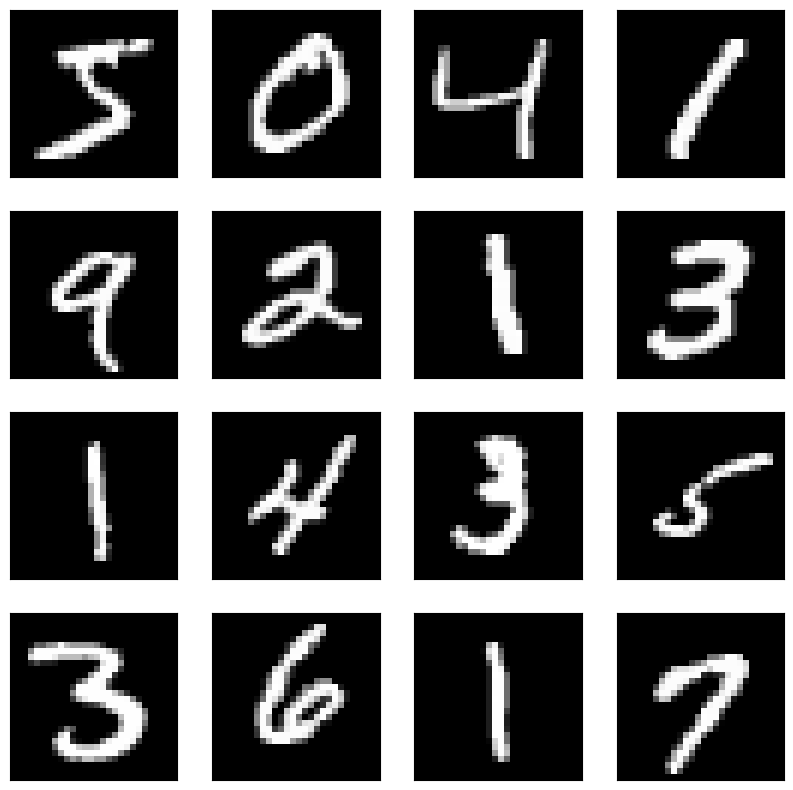

In [48]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], aspect=1, cmap='gray')
plt.show()

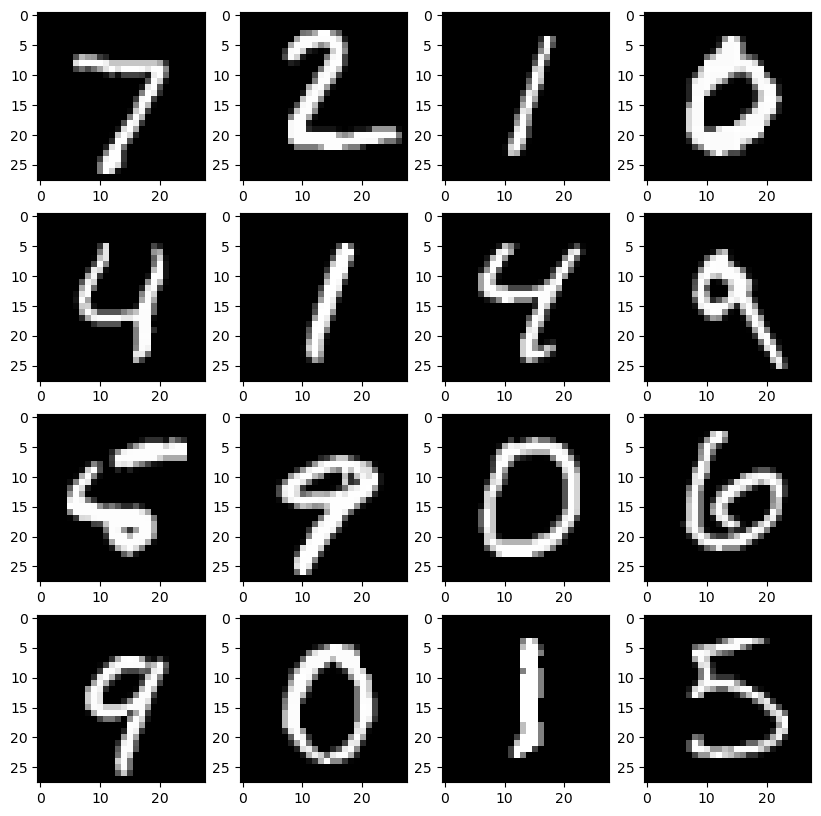

In [50]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i], aspect=1, cmap='gray')
plt.show()

In [52]:


# callback 
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    print(logs)
    if(logs.get('accuracy') > 0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True
                            
callbacks = myCallback()

# normalise 
x_train, x_test = x_train/255.0, x_test/255.0

# create model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

# fit model
history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

# stats 
print(history.epoch, history.history['accuracy'][-1])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1858/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8975 - loss: 0.3380{'accuracy': 0.9401833415031433, 'loss': 0.19838908314704895}
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8980 - loss: 0.3366
Epoch 2/10
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9748 - loss: 0.0818{'accuracy': 0.9757000207901001, 'loss': 0.08063160628080368}
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9748 - loss: 0.0818
Epoch 3/10
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9835 - loss: 0.0508{'accuracy': 0.9833166599273682, 'loss': 0.05138792842626572}
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9835 - loss: 0.0508
Epoch 4/10
1854/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9897 - loss: 0.0323{'accuracy': 0.9881166815757751, 'loss': 0.036648619920015335}
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9897 - loss: 0.0323
Epoch 5/10
1860/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9928 - loss: 0.0235{'a

In [54]:
res = model.predict(x_test[11:12])
print(res)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[7.7302611e-06 3.2669866e-15 8.3103879e-10 1.4112179e-12 2.2475581e-08
  1.7339897e-06 9.9998057e-01 4.0731821e-11 9.9336448e-06 3.1967278e-12]]


In [56]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
res = probability_model.predict(x_test[11:12])
index = np.argmax(res)
print(res)
print(index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.08533765 0.08533699 0.08533699 0.08533699 0.08533699 0.08533713
  0.23196547 0.08533699 0.08533783 0.08533699]]
6


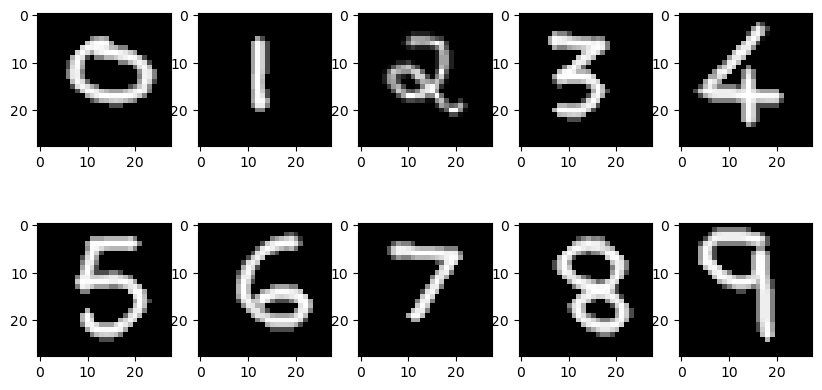

In [58]:
img_names = ['0.png', '1.png','2.png','3.png','4.png','5.png','6.png','7.png','8.png','9.png']
imgs = [np.array(Image.open(img_name)) for img_name in img_names]

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(imgs[i], aspect=1, cmap='gray')
plt.show()

In [60]:
def predict():
    img_data = np.array(imgs)
    res = probability_model.predict(img_data)
    print([np.argmax(a) for a in res])
predict()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[9, 2, 2, 3, 6, 5, 6, 2, 8, 3]


In [62]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model2.summary())

# fit model
history2 = model2.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

# stats 
print(history.epoch, history.history['accuracy'][-1])

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     2,769,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,774,858 (10.59 MB)

 Trainable params: 2,774,858 (10.59 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9219 - loss: 0.2557{'accuracy': 0.961483359336853, 'loss': 0.12561319768428802}
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9219 - loss: 0.2555
Epoch 2/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9875 - loss: 0.0401{'accuracy': 0.9871166944503784, 'loss': 0.04059324041008949}
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9875 - loss: 0.0401
Epoch 3/10
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9929 - loss: 0.0207{'accuracy': 0.9926499724388123, 'loss': 0.021814724430441856}

Reached 99% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9929 - loss: 0.0207
[0, 1, 2, 3, 4] 0.9918166399002075


(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[7]


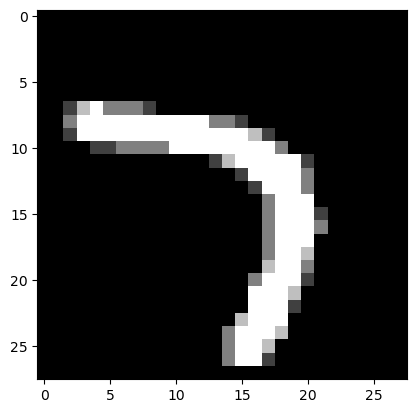

In [40]:
img_input = x_test[60:61]
print(img_input.shape)
res = model2.predict(img_input)
print(res)
print([np.argmax(a) for a in res])
plt.imshow(img_input.reshape(28, 28), aspect=1, cmap='gray')

(60000, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
[[7.8286055e-10 6.0525537e-08 9.9999869e-01 1.1761827e-07 3.3024583e-10
  1.5197959e-11 1.3801425e-10 1.8038371e-07 9.3315327e-07 8.1548518e-10]]
[2]


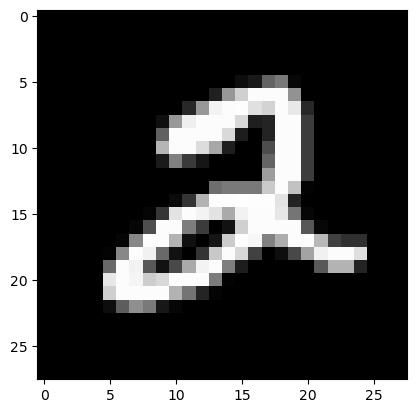

In [64]:
img_data = img_data.reshape(img_data.shape[0], 28, 28, 1)
img_input = img_data[5]
print(img_data.shape)
res = model2.predict(img_input.reshape(1, 28, 28, 1))
print(res)
print([np.argmax(a) for a in res])
plt.imshow(img_input.reshape(28, 28), aspect=1, cmap='gray')